In [2]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np

In [3]:
def viz_nf(filename='contam_fractions.npz'):
    data = np.load(filename)
    midnight= data['result_mjds'][:, 4]
    mjds = (data['result_mjds'].T - data['result_mjds'][:,4])*24.
    night = data['result_fractions'][:,-1]
    night = np.tile(night,9).reshape(mjds.shape)
    plt.scatter(mjds.ravel(), night.ravel(), c=data['result_fractions'][:,:-1].T.ravel(), alpha=1)
    cb = plt.colorbar()
    plt.xlabel('Time from midnight (hours)')
    plt.ylabel('Night (days)')
    cb.set_label('Fraction of fields with satellites in 30s')
    plt.ylim([0,366])

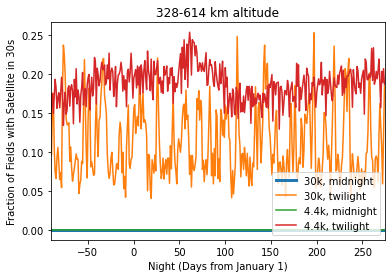

In [4]:
#def viz_nf2(filename='contam_fractions.npz'):
filename='contam_fractions_scale.npz'
data = np.load(filename)
midnight= data['result_mjds'][:, 4]
mjds = (data['result_mjds'].T - data['result_mjds'][:,4])*24.
night = data['result_fractions'][:,-1]

nsats = '30k'

# jan 1, 2023
jan_1_offset = -data['result_mjds'][:, 4][0] + 59945 

mjds = mjds[:,4]
frac = data['result_fractions'][:,4]

plt.plot(night - jan_1_offset, frac, label='%s, midnight' % nsats, linewidth=3.0)
plt.xlim([0,366])
plt.xlabel('Night (days)')
plt.ylabel('Fraction of Fields with Satellite in 30s')
plt.title('Midnight')


midnight= data['result_mjds'][:, 4]
mjds = (data['result_mjds'].T - data['result_mjds'][:,4])*24.
night = data['result_fractions'][:,-1]

mjds = mjds[:,4]
frac = data['result_fractions'][:,0]
good = np.where(frac > 0)
plt.plot(night[good] - jan_1_offset, frac[good], label='%s, twilight' % nsats)



#def viz_nf2(filename='contam_fractions.npz'):
filename='contam_fractions_scale4k.npz'
data = np.load(filename)
midnight= data['result_mjds'][:, 4]
mjds = (data['result_mjds'].T - data['result_mjds'][:,4])*24.
night = data['result_fractions'][:,-1]

nsats='4.4k'

mjds = mjds[:,4]
frac = data['result_fractions'][:,4]

plt.plot(night - jan_1_offset, frac, label= '%s, midnight' % nsats)
plt.xlim([-jan_1_offset,366-jan_1_offset])
plt.xlabel('Night (Days from January 1)')
plt.ylabel('Fraction of Fields with Satellite in 30s')
plt.title('')



frac = data['result_fractions'][:,0]
# clean up what I think is an ephem bug
good = np.where(frac > 0)[0]
plt.plot(night[good] - jan_1_offset, frac[good], label='%s, twilight' % nsats)


plt.legend(loc="lower right")
plt.title('328-614 km altitude')
plt.savefig('frac_with_sats.pdf')

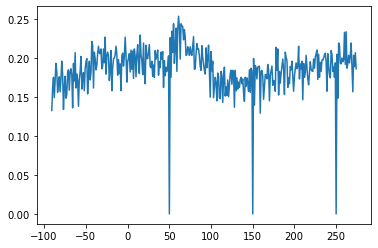

In [5]:
plt.plot(night - jan_1_offset, frac, label='4.4k, twilight')


In [6]:
data['result_fractions']


array([[1.32554945e-01, 1.62774725e-01, 1.61401099e-01, ...,
        1.57280220e-01, 1.70329670e-01, 0.00000000e+00],
       [1.62087912e-01, 1.78571429e-01, 1.79945055e-01, ...,
        1.64835165e-01, 1.53159341e-01, 1.00000000e+00],
       [1.75137363e-01, 1.67582418e-01, 1.84065934e-01, ...,
        1.59340659e-01, 1.75824176e-01, 2.00000000e+00],
       ...,
       [1.88873626e-01, 1.79258242e-01, 1.76510989e-01, ...,
        1.80631868e-01, 2.04670330e-01, 3.63000000e+02],
       [2.06730769e-01, 1.77884615e-01, 1.70329670e-01, ...,
        1.86126374e-01, 1.53846154e-01, 3.64000000e+02],
       [1.86126374e-01, 1.71016484e-01, 1.49725275e-01, ...,
        1.82005495e-01, 1.76510989e-01, 3.65000000e+02]])

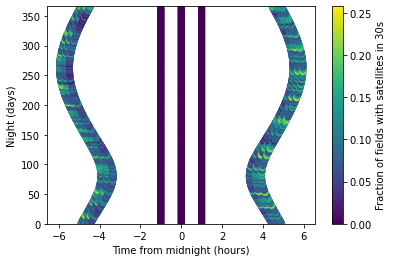

In [7]:
viz_nf('contam_fractions_scale.npz')

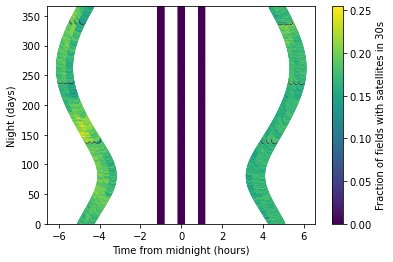

In [8]:
viz_nf('contam_fractions_scale4k.npz')